In [3]:
from gensim.corpora import Dictionary

dictionary = Dictionary.load('final_dictionary_file')
print('Dictonary length: ', len(dictionary), '\n')
# for token, idx in dictionary.token2id.items(): print(token, idx)

Dictonary length:  1858 



In [4]:
file_path = r'C:\Users\Usuario\Documents\JupyterFolder\unimi_files\IR\attempt01\glossary.txt' # Replace with the path to your text file
with open(file_path, 'r') as file: lines = file.readlines()
glossary = [line.strip() for line in lines]
# print(glossary[:10])

file_path = r'C:\Users\Usuario\Documents\JupyterFolder\unimi_files\IR\attempt01\target_topics.txt'
with open(file_path, 'r') as file: lines = file.readlines()
targets = [line.strip() for line in lines]
# print(targets[:10])


import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

import numpy as np
np.random.seed(400)

stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def lemmatize(token):
    return lemmatizer.lemmatize(token, pos='v')

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize_stemming(token))
    return result

def save_reference(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemmatize(token))
    return result

glossary_processed = [preprocess(doc) for doc in glossary]
glossary_reference = [save_reference(doc) for doc in glossary]

targets_processed = [preprocess(doc) for doc in targets]
targets_reference = [save_reference(doc) for doc in targets]

processed_docs = glossary_processed + targets_processed
reference_docs = glossary_reference + targets_reference

stem_ref = [stem for doc in processed_docs for stem in doc]
lemm_ref = [lemma for doc in reference_docs for lemma in doc]

## Create corpus

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
import json
import os
import numpy as np
import ast

path_original_data = r'C:\Users\Usuario\Documents\JupyterFolder\unimi_files\IR\attempt01'
df = pd.read_csv(os.path.join(path_original_data,'post_processed_comment_data_demo.csv'), low_memory=False)
string_list = df['gensim_comment'].tolist()
comments_list = [ast.literal_eval(s) for s in string_list]

import random

bow_corpus = [dictionary.doc2bow(doc) for doc in comments_list]
print('Length of the corpus: ', len(bow_corpus), '\n')

random_number = round(random.uniform(0, len(bow_corpus)))
bow_doc_x = bow_corpus[random_number]
for i in range(len(bow_doc_x)): print("Word {} (“{}”) appears {} time.".format(bow_doc_x[i][0], dictionary[bow_doc_x[i][0]], bow_doc_x[i][1]))

Length of the corpus:  73336 

Word 54 (“deck”) appears 1 time.
Word 826 (“draw”) appears 1 time.
Word 854 (“best”) appears 1 time.
Word 961 (“year”) appears 1 time.
Word 1132 (“incred”) appears 1 time.
Word 1229 (“negat”) appears 1 time.
Word 1288 (“enorm”) appears 1 time.


## Train model

In [7]:
# lda = gensim.models.LdaMulticore(bow_corpus, num_topics = 20, id2word = dictionary, passes = 50, workers = 2)

# Lda = gensim.models.ldamodel.LdaModel
# lda = Lda(bow_corpus, num_topics=3, id2word = dictionary, passes=50)

## Compute coherence

In [8]:
def write_to_file(string, filename):
    with open(filename, 'a') as file: file.write(string + '\n')

In [9]:
from gensim.models.coherencemodel import CoherenceModel

for n in range(2, 42, 4):

    lda = gensim.models.LdaMulticore(bow_corpus, num_topics = n, id2word = dictionary, passes = 50, workers = 2)

    # Assuming you have already trained the LDA model and have the necessary variables: lda, bow_corpus, and dictionary

    coherence_model = CoherenceModel(model=lda, corpus=bow_corpus, dictionary=dictionary, coherence='u_mass')
    coherence = coherence_model.get_coherence()

    # Retrieve the top topics and their coherence scores
    top_topics = coherence_model.get_coherence_per_topic()

    # Print the top topics and their coherence scores
    # for i, coherence_score in enumerate(top_topics[:3]):
        # print(f"Topic #{i+1}: Coherence Score = {coherence_score:.4f}")
    s = f'COHERENCE ({n}): {coherence}'
    write_to_file(s, 'coherence.txt')
    print(s)    



    coherence_model = CoherenceModel(model=lda, texts=comments_list, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    # Retrieve the top topics and their coherence scores
    top_topics = coherence_model.get_coherence_per_topic()

    # Print the top topics and their coherence scores
    # for i, coherence_score in enumerate(top_topics[:3]):
        # print(f"Topic #{i+1}: Coherence Score = {coherence_score:.4f}")
    s = f'COHERENCE ({n}): {coherence}'
    write_to_file(s, 'coherence.txt')
    print(s)  



    coherence_model = CoherenceModel(model=lda, texts=comments_list, dictionary=dictionary, coherence='c_npmi')
    coherence = coherence_model.get_coherence()

    # Retrieve the top topics and their coherence scores
    top_topics = coherence_model.get_coherence_per_topic()

    # Print the top topics and their coherence scores
    # for i, coherence_score in enumerate(top_topics[:3]):
        # print(f"Topic #{i+1}: Coherence Score = {coherence_score:.4f}")
    s = f'COHERENCE ({n}): {coherence}'
    write_to_file(s, 'coherence.txt')
    print(s)    

COHERENCE (2): -2.160718852152595
COHERENCE (2): 0.44292209759200213
COHERENCE (2): 8.944108495228826e-05
COHERENCE (6): -2.438004136782084
COHERENCE (6): 0.5182568222420105
COHERENCE (6): 0.03847095598071221
COHERENCE (10): -2.694958123617773
COHERENCE (10): 0.5210771278699302
COHERENCE (10): 0.04733433567737473
COHERENCE (14): -3.0991802119715155
COHERENCE (14): 0.508397026071734
COHERENCE (14): 0.03545091248997872
COHERENCE (18): -3.0596238087411525
COHERENCE (18): 0.49782813920882624
COHERENCE (18): 0.032473963964275904
COHERENCE (22): -3.223179360426133
COHERENCE (22): 0.5002360871636541
COHERENCE (22): 0.026329005376549645
COHERENCE (26): -3.0756944548393155
COHERENCE (26): 0.4929829716530439
COHERENCE (26): 0.032443077371715805
COHERENCE (30): -3.485277778423743
COHERENCE (30): 0.4744936273777896
COHERENCE (30): 0.012954161719511146
COHERENCE (34): -3.160709908935156
COHERENCE (34): 0.47088150940282175
COHERENCE (34): 0.026830069074162407
COHERENCE (38): -3.5161765901861957
COHE

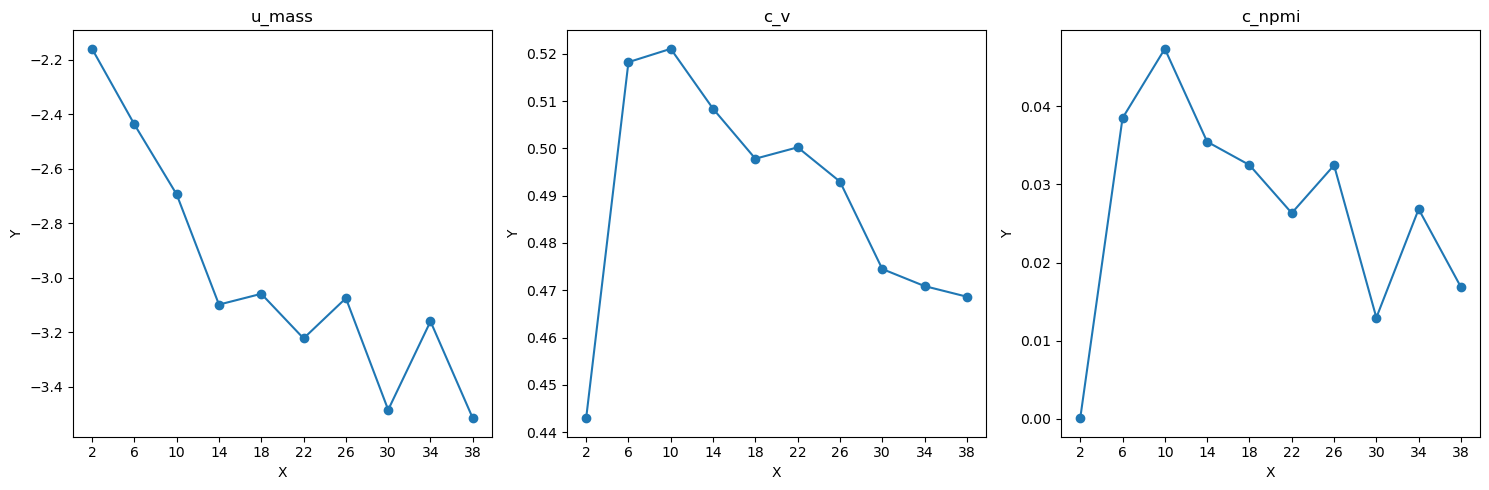

In [30]:
import matplotlib.pyplot as plt

# Read the data from the text file
with open('coherence.txt', 'r') as file:
    lines = file.readlines()

# Extract every three lines for each measure
coherence_data = [lines[i::3] for i in range(3)]

# Create a grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over each measure and plot the data
measures = ['u_mass', 'c_v', 'c_npmi']
for i, measure_data in enumerate(coherence_data):
    # Extract x and y values from the data
    data = [(2 + 4 * j, float(line.strip().split(':')[1])) for j, line in enumerate(measure_data)]
    x_values, y_values = zip(*data)

    # Plot the graph on the corresponding subplot
    axes[i].plot(x_values, y_values, marker='o')

    # Set x-axis ticks in increments of four starting from 2
    x_ticks = range(2, max(x_values) + 1, 4)
    axes[i].set_xticks(x_ticks)

    # Set labels and title for the subplot
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_title(measures[i])

# Adjust the layout and spacing between subplots
plt.tight_layout()

# Show the combined graph
plt.show()

## Human verification

In [62]:
for topic, words in lda.print_topics()[:5]:
    print(topic, words, '\n')

0 0.051*"differ" + 0.045*"replay" + 0.042*"strategi" + 0.028*"lot" + 0.026*"high" + 0.020*"theme" + 0.017*"mar" + 0.015*"incred" + 0.015*"terraform" + 0.014*"mechan" 

1 0.171*"expans" + 0.128*"look" + 0.057*"better" + 0.057*"forward" + 0.057*"add" + 0.043*"base" + 0.032*"new" + 0.014*"origin" + 0.014*"addit" + 0.014*"need" 

2 0.136*"love" + 0.034*"favorit" + 0.030*"get" + 0.029*"year" + 0.026*"enjoy" + 0.025*"group" + 0.024*"friend" + 0.023*"tabl" + 0.022*"want" + 0.021*"wife" 

3 0.048*"bite" + 0.034*"feel" + 0.034*"think" + 0.030*"lot" + 0.028*"long" + 0.026*"littl" + 0.022*"enjoy" + 0.019*"take" + 0.017*"interest" + 0.016*"pretti" 

4 0.081*"build" + 0.074*"worker" + 0.070*"placement" + 0.069*"deck" + 0.048*"resourc" + 0.041*"manag" + 0.029*"area" + 0.027*"control" + 0.018*"race" + 0.017*"combin" 



In [63]:
def find_element_in_lists(a, b, target):
    try:
        index = a.index(target)
        return b[index]
    except ValueError:
        return None

In [64]:
def extract_comment(n):
    target_bow = bow_corpus[n]  # Example target `bow_corpus` element to find its corresponding index in `comments_list`

    index = next((i for i, bow_element in enumerate(bow_corpus) if bow_element == target_bow), None)

    if index is not None:
        print("Index of the element in `comments_list`:", index)
    else:
        print("Element not found in `comments_list`.")
    print()

    document_bow = bow_corpus[index]

    # Convert the document back to its original form
    document_original = " ".join([dictionary[id] for id, _ in document_bow])

    # Print the original document
    print("Original Document:")
    print(document_original)
    print()

    element = comments_list[index]

    # Retrieve the corresponding 'comment' field from df
    comment = df.loc[index, 'comment']

    print("Element from comments_list:")
    print(element)
    print()
    print("Corresponding 'comment' field:")
    print(comment)
    print()

    return document_bow

In [69]:
import random
from nltk.stem import WordNetLemmatizer
import operator

lemmatizer = WordNetLemmatizer()
random_number = round(random.uniform(0, len(bow_corpus)))

document_topics = lda.get_document_topics(extract_comment(random_number))
sorted_topics = sorted(document_topics, key=operator.itemgetter(1), reverse=True)

print("Topics:")
for topic_id, topic_prob in sorted_topics[:3]:
    print(f"Topic ID: {topic_id}, Probability: {topic_prob}")
    for word_id, p in lda.get_topic_terms(topic_id):
        if find_element_in_lists(stem_ref, lemm_ref, dictionary[word_id]) is None: 
            word = lemmatizer.lemmatize(dictionary[word_id])
        else:    
            word = find_element_in_lists(stem_ref, lemm_ref, dictionary[word_id]).upper()
        print(word, p)
    print()
 

Index of the element in `comments_list`: 7391

Original Document:
action collect go think theme race placement worker land need potenti demand explor quick advanc feel want way start best abl finish actual high playthrough later fulli order combo island choos journey

Element from comments_list:
['great', 'worker', 'placement', 'game', 'need', 'playthrough', 'order', 'fulli', 'grap', 'potenti', 'game', 'start', 'shine', 'abl', 'action', 'combo', 'go', 'best', 'way', 'advanc', 'action', 'need', 'seal', 'high', 'demand', 'game', 'feel', 'like', 'race', 'quick', 'choos', 'want', 'finish', 'explor', 'land', 'sea', 'specimen', 'theme', 'journey', 'island', 'collect', 'specimen', 'actual', 'theori', 'evolut', 'actual', 'think', 'later', 'england']

Corresponding 'comment' field:
A great worker placement game that really needs more than one playthrough in order to fully grap its potential. The game really starts to shine once you are able to get action combo's going and the best way to do thi

## Trim the dictionary of common terms

In [52]:
def write_words_to_file(word_list, filename):
    with open(filename, 'a') as file:
        for word in word_list:
            file.write(word + '\n')

In [51]:
from gensim import models

# Get the topic-word distribution matrix
topic_word_matrix = lda.get_topics()

# Get the vocabulary from the LDA model
vocab = lda.id2word

word_counts = {}

# Iterate over each topic
for topic_idx, topic_words in enumerate(topic_word_matrix):
    # print(f"Topic {topic_idx + 1}:")
    
    # Sort the word indices based on the word probabilities
    word_indices = topic_words.argsort()[::-1]
    
    # Iterate over the top 10 words for the topic
    for rank, word_idx in enumerate(word_indices[:10]):
        word = vocab[word_idx]
        word_prob = topic_words[word_idx]
        
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
        
        # print(f"   {rank + 1}. {word}: {word_prob:.4f}")

sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
words_to_remove = []
for word, count in sorted_word_counts:
    if count > 2: 
        print(f'{word}: {count}') 
        words_to_remove.append(word)
        
write_words_to_file(words_to_remove, 'words_to_remove.txt')        

time: 5
card: 5
great: 4
like: 3
good: 3
board: 3
fun: 3
